In [1]:
import pandas as pd

# Load LA foot traffic
df_ft = pd.read_csv('../data/la_foot_traffic.csv')

# 1. Overall structure
print(df_ft.info())

# 2. First few rows
display(df_ft.head())

# 3. raw_visit_counts summary
print(df_ft['raw_visit_counts'].describe())

# 4. All categories present
print('Unique top_category values:', df_ft['top_category'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128908 entries, 0 to 128907
Data columns (total 52 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   placekey                                    128908 non-null  object 
 1   parent_placekey                             18080 non-null   object 
 2   safegraph_brand_ids                         9516 non-null    object 
 3   location_name                               128908 non-null  object 
 4   brands                                      9516 non-null    object 
 5   store_id                                    10071 non-null   object 
 6   top_category                                128908 non-null  object 
 7   sub_category                                105217 non-null  object 
 8   naics_code                                  128908 non-null  int64  
 9   latitude                                    128908 non-null  float64
 

,placekey,parent_placekey,safegraph_brand_ids,location_name,brands,store_id,top_category,sub_category,naics_code,latitude,...,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,normalized_visits_by_total_visits,normalized_visits_by_total_visitors
0,22h-222@5z4-zwd-ffz,NaN,NaN,MagIQ Room,NaN,NaN,Other Amusement and Recreation Industries,All Other Amusement and Recreation Industries,713990,34.053263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22h-222@5z4-zw9-syv,NaN,NaN,DormShare Westwood,NaN,NaN,Traveler Accommodation,Hotels (except Casino Hotels) and Motels,721110,34.063814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzy-223@5z5-3rs-k75,NaN,NaN,Ace Hotel Inn,NaN,NaN,Traveler Accommodation,Hotels (except Casino Hotels) and Motels,721110,34.044048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,224-224@5z5-3qs-cqz,NaN,NaN,888 Wilshire,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,34.049845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,225-222@5z6-3py-9s5,NaN,NaN,Jim Dandy Fried Chicken,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,33.931619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


count    57817.000000
mean        23.332324
std        155.662286
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max      16522.000000
Name: raw_visit_counts, dtype: float64
Unique top_category values: ['Other Amusement and Recreation Industries' 'Traveler Accommodation'
 'Restaurants and Other Eating Places'
 'Personal and Household Goods Repair and Maintenance'
 'Personal Care Services' 'Drycleaning and Laundry Services'
 'Religious Organizations' 'Building Finishing Contractors'
 'Home Furnishings Stores' 'Clothing Stores'
 'Newspaper, Periodical, Book, and Directory Publishers'
 'Services to Buildings and Dwellings'
 'Automotive Parts, Accessories, and Tire Stores' 'Grocery Stores'
 'Specialty Food Stores' 'Motion Picture and Video Industries'
 'Agencies, Brokerages, and Other Insurance Related Activities'
 'Offices of Real Estate Agents and Brokers' 'Legal Services'
 'Other Schools and Instruction' 'Offices of Dentists'
 'Offices of Other H

In [2]:
# Define your upscale categories
upscale = [
    "Restaurants and Other Eating Places",
    "Jewelry, Luggage, and Leather Goods Stores",
    "Fitness and Recreational Sports Centers"
]

# Filter and examine
df_up = df_ft[df_ft['top_category'].isin(upscale)].dropna(subset=['raw_visit_counts'])
print("Total upscale rows:", len(df_up))
print(df_up['raw_visit_counts'].describe())
display(df_up.head(10))


Total upscale rows: 8882
count    8882.000000
mean       22.369511
std        69.886611
min         1.000000
25%         2.000000
50%         7.000000
75%        21.000000
max      1840.000000
Name: raw_visit_counts, dtype: float64


,placekey,parent_placekey,safegraph_brand_ids,location_name,brands,store_id,top_category,sub_category,naics_code,latitude,...,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,normalized_visits_by_total_visits,normalized_visits_by_total_visitors
47,239-222@5z4-zwd-g49,NaN,NaN,The Beverly Hills Bagel,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,34.055577,...,95.0,"{ """"<5"""":0, """"5-20"""":0, """"21-60"""":0, """"61-240""...","{""""7-Eleven"""":0,""""ASICS"""":0,""""Advance Auto Par...","{""""7-Eleven"""":0,""""76"""":0,""""800 Degrees Woodfir...",NaN,14.0,0.000001,0.000005,9.295912e-08,0.000002
48,229-224@5z6-3r5-2hq,NaN,NaN,Oscarito's Catering,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,34.029731,...,26.0,"{ """"<5"""":0, """"5-20"""":0, """"21-60"""":0, """"61-240""...","{""""7-Eleven Fuel"""":0,""""99 Cents Only Stores"""":...","{""""7-Eleven"""":0,""""7-Eleven Fuel"""":0,""""76"""":0,""...",NaN,12.0,0.000001,0.000005,7.666877e-08,0.000001
49,222-223@5z5-3r6-5cq,NaN,NaN,Taste of Thai,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,34.097838,...,14.0,"{ """"<5"""":0, """"5-20"""":0, """"21-60"""":0, """"61-240""...","{""""24 Hour Fitness"""":0,""""7-Eleven"""":0,""""7-Elev...","{""""24 Hour Fitness"""":0,""""7-Eleven"""":0,""""7-Elev...",NaN,12.0,0.000001,0.000005,7.666877e-08,0.000001
50,zzy-223@5z5-3qy-m8v,NaN,NaN,Swami's Sandwiches Food Truck,NaN,NaN,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515,34.036463,...,69.0,"{ """"<5"""":0, """"5-20"""":0, """"21-60"""":0, """"61-240""...","{""""7-Eleven"""":0,""""76"""":0,""""85 Degrees C Bakery...","{""""1-800-Flowers"""":0,""""24 Hour Fitness"""":0,""""4...",NaN,14.0,0.000004,0.000008,9.573650e-08,0.000002
51,222-223@5z5-3qt-9j9,NaN,NaN,Gogo's Tacos,NaN,NaN,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515,34.076158,...,14.0,"{ """"<5"""":0, """"5-20"""":0, """"21-60"""":0, """"61-240""...","{""""24 Hour Fitness"""":0,""""76"""":0,""""99 Cents Onl...","{""""24 Hour Fitness"""":0,""""2nd Wind Exercise Equ...",NaN,12.0,0.000003,0.000007,7.666877e-08,0.000001
57,222-22f@5z5-3rs-k4v,NaN,NaN,Artistry of Gold,NaN,NaN,"Jewelry, Luggage, and Leather Goods Stores",Jewelry Stores,448310,34.046664,...,37.0,"{ """"<5"""":1, """"5-20"""":0, """"21-60"""":0, """"61-240""...","{""""4 Wheel Parts"""":0,""""7-Eleven"""":0,""""76"""":0,""...","{""""24 Hour Fitness"""":0,""""4 Wheel Parts"""":0,""""7...",NaN,24.0,0.000012,0.000046,1.623255e-07,0.000003
58,zzw-222@5z5-3rk-s89,NaN,NaN,Lucky Jewelry Store,NaN,NaN,"Jewelry, Luggage, and Leather Goods Stores",Jewelry Stores,448310,34.062820,...,9.0,"{ """"<5"""":1, """"5-20"""":0, """"21-60"""":0, """"61-240""...","{""""7-Eleven"""":0,""""7-Eleven Fuel"""":0,""""99 Cents...","{""""168 Market"""":0,""""24 Hour Fitness"""":0,""""7 Le...",NaN,28.0,0.000012,0.000047,1.867490e-07,0.000003
59,225-226@5z5-3qt-6hq,NaN,NaN,Body Jewelry,NaN,NaN,"Jewelry, Luggage, and Leather Goods Stores",Jewelry Stores,448310,34.063873,...,201.0,"{ """"<5"""":0, """"5-20"""":0, """"21-60"""":0, """"61-240""...","{""""7-Eleven"""":0,""""7-Eleven Fuel"""":0,""""76"""":0,""...","{""""24 Hour Fitness"""":0,""""7-Eleven"""":0,""""7-Elev...",NaN,28.0,0.000012,0.000047,1.867490e-07,0.000003
65,zzw-226@5z5-3rh-ht9,NaN,NaN,The Edmondson Faculty Center,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,34.060765,...,99.0,"{ """"<5"""":0, """"5-20"""":0, """"21-60"""":0, """"61-240""...","{""""7-Eleven"""":0,""""76"""":0,""""AAA / CAA"""":0,""""AIS...","{""""24 Hour Fitness"""":0,""""7-Eleven"""":0,""""76"""":0...",NaN,26.0,0.000003,0.000010,1.724053e-07,0.000003
66,223-222@5z6-3q8-z75,NaN,SG_BRAND_4941482324b30ad4733c1566b12af9c6,Jack in the Box,Jac

In [3]:
# Reload full dataset without any filtering
df_full = pd.read_csv('../data/la_foot_traffic.csv')

print("Total rows in full LA foot‐traffic dataset:", len(df_full))

# Your upscale filter again
upscale = [
    "Restaurants and Other Eating Places",
    "Jewelry, Luggage, and Leather Goods Stores",
    "Fitness and Recreational Sports Centers"
]
df_up = df_full[df_full['top_category'].isin(upscale)]

print("Rows matching upscale categories:", len(df_up))


Total rows in full LA foot‐traffic dataset: 128908
Rows matching upscale categories: 17840


In [4]:
# Fill null raw_visit_counts with zero
df_full['raw_visit_counts'] = df_full['raw_visit_counts'].fillna(0)

# Re‐apply your upscale filter without dropping
df_up2 = df_full[df_full['top_category'].isin(upscale)]

print("Rows after imputation & filtering:", len(df_up2))
print(df_up2['raw_visit_counts'].describe())
display(df_up2.head(10))


Rows after imputation & filtering: 17840
count    17840.000000
mean        11.137108
std         50.563147
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max       1840.000000
Name: raw_visit_counts, dtype: float64


,placekey,parent_placekey,safegraph_brand_ids,location_name,brands,store_id,top_category,sub_category,naics_code,latitude,...,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,normalized_visits_by_total_visits,normalized_visits_by_total_visitors
3,224-224@5z5-3qs-cqz,NaN,NaN,888 Wilshire,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,34.049845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,225-222@5z6-3py-9s5,NaN,NaN,Jim Dandy Fried Chicken,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,33.931619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,zzw-222@5z5-3qy-sqz,NaN,NaN,Live Basil Pizza,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,34.044180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,228-222@5z5-3r8-ghq,NaN,NaN,Sultani Restaurant,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,34.098914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,zzy-229@5z5-3r7-4jv,NaN,NaN,Shenanigans,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,34.111894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,zzw-222@5z5-3r9-vmk,NaN,NaN,El Chato Taco Truck,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,34.056890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,222-225@5z6-3qz-xbk,NaN,NaN,Pupuseria El Conquistador,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,34.012892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,226-224@5z5-3rs-td9,NaN,NaN,Q's Chicken,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,722511,34.035008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,227-224@5z4-zvm-qzz,NaN,SG_BRAND_de80593878cb1673c62a7f338dc7e4e1,Subway,Subway,57451-0,Restaurants and Other Eating Places,Limited-Service Restaurants,722513,34.032156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,zzw-22q@5z5-3r5-5zz,NaN,NaN,Pipeline Wrap,NaN,NaN,Restaurants and Other Eating Places,Limited-Service Restaurants,722513,34.098350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


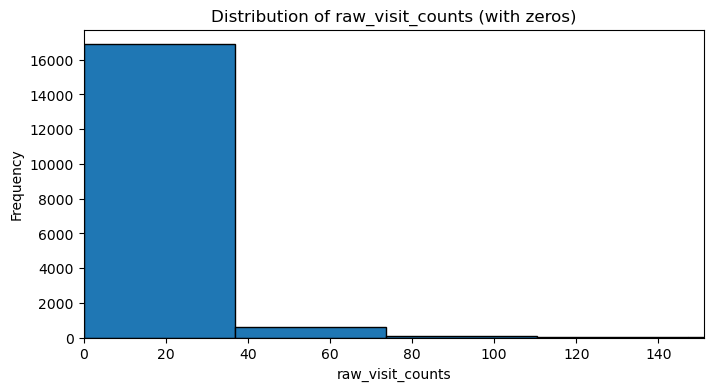

In [5]:
import matplotlib.pyplot as plt

# Plot distribution of raw_visit_counts after imputation
plt.figure(figsize=(8,4))
plt.hist(df_up2['raw_visit_counts'], bins=50, edgecolor='black')
plt.title('Distribution of raw_visit_counts (with zeros)')
plt.xlabel('raw_visit_counts')
plt.ylabel('Frequency')
plt.xlim(0, df_up2['raw_visit_counts'].quantile(0.99))  # zoom in on 99th percentile
plt.show()


In [6]:
import geopandas as gpd

# Load and inspect
tesla = gpd.read_file('../data/current_tesla_chargers.geojson')

print("🗄️ GeoDataFrame info:")
print(tesla.info())

print("\n🏷️ First 10 rows:")
display(tesla.head(10))

print("\n📋 Columns available:")
print(tesla.columns.tolist())

# Check how many location_name values are non-null
print("\nNon-null in 'location_name':", tesla['location_name'].notna().sum(), "/", len(tesla))


🗄️ GeoDataFrame info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   placekey                                    43 non-null     object        
 1   parent_placekey                             0 non-null      object        
 2   safegraph_brand_ids                         43 non-null     object        
 3   location_name                               43 non-null     object        
 4   brands                                      43 non-null     object        
 5   store_id                                    42 non-null     object        
 6   top_category                                43 non-null     object        
 7   sub_category                                43 non-null     object        
 8   naics_code                                  43 non-null     in

,placekey,parent_placekey,safegraph_brand_ids,location_name,brands,store_id,top_category,sub_category,naics_code,latitude,...,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,normalized_visits_by_total_visits,normalized_visits_by_total_visitors,geometry
0,224-229@5z5-3rr-tgk,None,SG_BRAND_f1b70799140cbc1d,Tesla Destination Charger,Tesla Destination Charger,None,Gasoline Stations,Other Gasoline Stations,447190,34.052570,...,None,None,None,None,None,None,None,None,None,POINT (-118.25059 34.05257)
1,zzy-22b@5z5-3rs-7wk,None,SG_BRAND_f1b70799140cbc1d,Tesla Destination Charger,Tesla Destination Charger,dc12356,Gasoline Stations,Other Gasoline Stations,447190,34.050532,...,None,None,None,None,None,None,None,None,None,POINT (-118.24265 34.05053)
2,zzw-228@5z4-ztw-zcq,None,SG_BRAND_f1b70799140cbc1d,Tesla Destination Charger,Tesla Destination Charger,55258,Gasoline Stations,Other Gasoline Stations,447190,34.045694,...,None,None,None,None,None,None,None,None,None,POINT (-118.44449 34.04569)
3,zzw-22f@5z5-3r7-4jv,None,SG_BRAND_f1b70799140cbc1d,Tesla Destination Charger,Tesla Destination Charger,dc710,Gasoline Stations,Other Gasoline Stations,447190,34.100309,...,None,None,None,None,None,None,None,None,None,POINT (-118.32556 34.10031)
4,222-22g@5z5-3rr-rrk,None,SG_BRAND_f1b70799140cbc1d,Tesla Destination Charger,Tesla Destination Charger,dc6375,Gasoline Stations,Other Gasoline Stations,447190,34.052429,...,None,None,None,None,None,None,None,None,None,POINT (-118.25557 34.05243)
5,zzy-222@5z4-zvs-cqz,None,SG_BRAND_f1b70799140cbc1d,Tesla Destination Charger,Tesla Destination Charger,51687,Gasoline Stations,Other Gasoline Stations,447190,34.071637,...,None,None,None,None,None,None,None,None,None,POINT (-118.34454 34.07164)
6,222-222@5z4-zfv-zvf,None,SG_BRAND_f1b70799140cbc1d,Tesla Destination Charger,Tesla Destination Charger,51160,Gasoline Stations,Other Gasoline Stations,447190,34.106275,...,None,None,None,None,None,None,None,None,None,POINT (-118.39221 34.10628)
7,226-226@5z5-3r4-rx5,None,SG_BRAND_f1b70799140cbc1d,Tesla Destination Charger,Tesla Destination Charger,dc21293,Gasoline Stations,Other Gasoline Stations,447190,34.095944,...,None,None,None,None,None,None,None,None,None,POINT (-118.37109 34.09594)
8,zzw-225@5z4-zw9-syv,None,SG_BRAND_f1b70799140cbc1d,Tesla Destination Charger,Tesla Destination Charger,dc4959,Gasoline Stations,Other Gasoline Stations,447190,34.058531,...,None,None,None,None,None,None,None,None,None,POINT (-118.44768 34.05853)
9,223-226@5z5-3qs-fmk,None,SG_BRAND_f1b70799140cbc1d,Tesla Destination Charger,Tesla Destination Charger,dc2826,Gasoline Stations,Other Gasoline Stations,447190,34.046135,...,None,None,None,None,None,None,None,None,None,POINT (-118.26623 34.04614)



📋 Columns available:
['placekey', 'parent_placekey', 'safegraph_brand_ids', 'location_name', 'brands', 'store_id', 'top_category', 'sub_category', 'naics_code', 'latitude', 'longitude', 'street_address', 'city', 'region', 'postal_code', 'open_hours', 'category_tags', 'opened_on', 'closed_on', 'tracking_closed_since', 'websites', 'geometry_type', 'polygon_wkt', 'polygon_class', 'enclosed', 'phone_number', 'is_synthetic', 'includes_parking_lot', 'iso_country_code', 'wkt_area_sq_meters', 'date_range_start', 'date_range_end', 'raw_visit_counts', 'raw_visitor_counts', 'visits_by_day', 'visits_by_each_hour', 'poi_cbg', 'visitor_home_cbgs', 'visitor_home_aggregation', 'visitor_daytime_cbgs', 'visitor_country_of_origin', 'distance_from_home', 'median_dwell', 'bucketed_dwell_times', 'related_same_day_brand', 'related_same_week_brand', 'device_type', 'normalized_visits_by_state_scaling', 'normalized_visits_by_region_naics_visits', 'normalized_visits_by_region_naics_visitors', 'normalized_visits

In [7]:
# Compute bounding boxes for foot traffic & chargers
import geopandas as gpd

# Re-create the GeoDataFrame if needed
gdf_ft = gpd.GeoDataFrame(df_full, 
                          geometry=gpd.points_from_xy(df_full.longitude, df_full.latitude),
                          crs="EPSG:4326")

def get_bounds(gdf):
    return {
        "lat_min":  gdf.geometry.y.min(),
        "lat_max":  gdf.geometry.y.max(),
        "lon_min":  gdf.geometry.x.min(),
        "lon_max":  gdf.geometry.x.max()
    }

bounds_ft     = get_bounds(gdf_ft)
bounds_chargers = get_bounds(tesla)

print("📊 Foot Traffic bounds:", bounds_ft)
print("🔌 Chargers bounds:    ", bounds_chargers)


📊 Foot Traffic bounds: {'lat_min': 32.893994, 'lat_max': 47.618239, 'lon_min': -122.134543, 'lon_max': -117.146382}
🔌 Chargers bounds:     {'lat_min': 33.94585, 'lat_max': 34.136593, 'lon_min': -118.468599, 'lon_max': -118.240872}


In [8]:
# Define a manual LA bounding box
lat_min, lat_max = 33.7, 34.4
lon_min, lon_max = -118.7, -117.6

# Filter the full foot‐traffic DataFrame to LA only
df_la_ft = df_full[
    (df_full['latitude'] >= lat_min) &
    (df_full['latitude'] <= lat_max) &
    (df_full['longitude'] >= lon_min) &
    (df_full['longitude'] <= lon_max)
]

print("Rows inside LA box:", len(df_la_ft))
print(df_la_ft['raw_visit_counts'].describe())


Rows inside LA box: 128891
count    128891.000000
mean         10.456510
std         104.882449
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max       16522.000000
Name: raw_visit_counts, dtype: float64


In [10]:
import pandas as pd, geopandas as gpd, folium
from folium.plugins import HeatMap, MarkerCluster

# 1. Reload & filter LA foot traffic with the correct path
df_full = pd.read_csv('../data/la_foot_traffic.csv')
df_full['raw_visit_counts'] = df_full['raw_visit_counts'].fillna(0)
lat_min, lat_max = 33.7, 34.4
lon_min, lon_max = -118.7, -117.6
df_la_ft = df_full[
    (df_full.latitude.between(lat_min, lat_max)) &
    (df_full.longitude.between(lon_min, lon_max))
]

# 2. Reload Tesla chargers with the correct path
tesla = gpd.read_file('../data/current_tesla_chargers.geojson')

# 3. Build the map (same as before)
center_lat, center_lon = (lat_min+lat_max)/2, (lon_min+lon_max)/2
m_la = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles='cartodbpositron')

HeatMap(
    [[r.latitude, r.longitude, r.raw_visit_counts] for _,r in df_la_ft.iterrows()],
    radius=15, blur=10
).add_to(m_la)

cluster = MarkerCluster().add_to(m_la)
for _, r in tesla.iterrows():
    folium.CircleMarker(
        [r.geometry.y, r.geometry.x], radius=6, color='red',
        fill=True, fill_opacity=0.9, popup=r['location_name']
    ).add_to(cluster)

m_la.fit_bounds([[lat_min, lon_min], [lat_max, lon_max]])
m_la


In [11]:
# Sanity‐check: compare raw CSV vs. filtered/imputed subset
df_source = pd.read_csv('../data/la_foot_traffic.csv')
sum_source = df_source['raw_visit_counts'].fillna(0).sum()
count_source = df_source['raw_visit_counts'].notna().sum()  # originally non‐null

sum_filtered = df_la_ft['raw_visit_counts'].sum()
count_filtered = df_la_ft.shape[0]  # points inside LA

print(f"📁 Source CSV:   total visits = {sum_source:.0f}, non‐null rows = {count_source}")
print(f"📊 Filtered LA:  total visits = {sum_filtered:.0f}, rows in LA = {count_filtered}")


📁 Source CSV:   total visits = 1349005, non‐null rows = 57817
📊 Filtered LA:  total visits = 1347750, rows in LA = 128891
